<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
# 공부시간과 성적의 관계 

|공부시간|성적|예측값|
|:---:|:---:|:---:|
|2|81|**83.6**|
|4|93|**88.2**|
|6|91|**92.8**|
|8|97|**97.4**|

##  공식
* $ 공부시간(x) 평균 : (2 + 4 + 6 + 8) / 4 = 5 $
* $ 성적(y) 평균     : (81 + 93 + 91 + 97) / 4 = 90.5 $
###  $ a = {(x - x평균)(y - y평균)     \over (x - x평균)^2의 합    } $
### $ b = y의 평균 - (x의 평균 \times 기울기 a) $
### $ y = ax + b $
#### $ y = 2.3x + 79 $


In [1]:
import numpy as np ## 계산을 위해 numpy 
import matplotlib.pyplot as pl

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

ax = np.mean(x) ## x의 모든 원소의 평균을 구하는 함수
by = np.mean(y) ## y의 모든 원소의 평균을 구하는 함수
print("ax = ",ax)
print("by = ",by)

## 최소 제곱근의 공식 으로 X에 대한 a의 기울기를 구함
## x, y의 (x값과 - x평균값의 차이) * (y값과 - y평균값의 차이)를 합한 값: 분자 값
def a_value(x, ax, y, by):
    result = 0;             ## 응답값 초기화
    
    ## x의 크기만큼 포문을 돌린다.
    for i in range(len(x)):
        result += (x[i] - ax) * (y[i] - by)
        
    return result

dividend = a_value(x, ax, y, by)
print("분자 값 = ", dividend);

## x의 편차(각 값과 평균값의 차이)를 제곱하해서 합한 값 : 분모 자
divisor = sum([(i - ax)**2 for i in x])
print("분모 값 = ", divisor)

ax =  5.0
by =  90.5
분자 값 =  46.0
분모 값 =  20.0


In [2]:
## X에 대한 기울기 a의 값
a_Inclination = dividend / divisor
print("기울기 a의 값 = ", a_Inclination)

기울기 a의 값 =  2.3


In [3]:
## y의 절편인 b 구하기 b =  y의 평균값과 - (x의 평균값 * a의 기울기) 차이로 구함
b = by - (ax * a_Inclination)
print("y의 절편 b의 값", b)

y의 절편 b의 값 79.0


In [4]:
## 예측값 구하기
def predicted_value(x, ax, y, by):
    p_value = []

    for i in range(len(x)):
        # y = 2.3x + 79
        p_value.append((a_Inclination * x[i]) + b)
        
        #오차값 : 예측값 - 성적
        native_err =  p_value[i]- y[i]
        
        print("[시간 : ", x[i] ,", 성적 : ", y[i] ,"] 예측값 [", p_value[i], "] 오차[", native_err ,"]")
        
    return p_value
        
p_value = predicted_value(x, ax, y, by)


[시간 :  2 , 성적 :  81 ] 예측값 [ 83.6 ] 오차[ 2.5999999999999943 ]
[시간 :  4 , 성적 :  93 ] 예측값 [ 88.2 ] 오차[ -4.799999999999997 ]
[시간 :  6 , 성적 :  91 ] 예측값 [ 92.8 ] 오차[ 1.7999999999999972 ]
[시간 :  8 , 성적 :  97 ] 예측값 [ 97.4 ] 오차[ 0.4000000000000057 ]


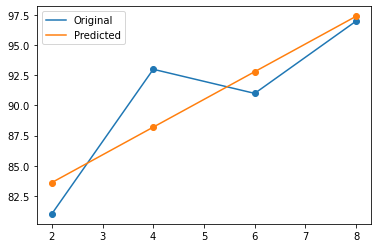

In [5]:
# x 값, y값 순서 
# 시간, 성적
pl.plot(x, y, label="Original")
pl.scatter(x, y)

# 시간, 예측
pl.plot(x, p_value, label="Predicted")
pl.scatter(x, p_value)

pl.legend()
pl.show()


In [6]:
## 오차범위 수정 가설 
a_Inclination = 2.77
b = 77

## 예측값 구하기
def predicted_value(x, ax, y, by):
    p_value = []

    for i in range(len(x)):
        # y = 2.3x + 79
        p_value.append((a_Inclination * x[i]) + b)
        
        #오차값 : 예측값 - 성적
        native_err =  int(p_value[i]) - y[i]
        mse = native_err ** 2        
        
        print("[시간 : ", x[i] ,", 성적 : ", y[i] ,"]" +
              "예측값 [", p_value[i], "] 오차[", native_err ,"], " +
              "오차의 합 [", mse , "]")
        
    return p_value
        
p_value = predicted_value(x, ax, y, by)

[시간 :  2 , 성적 :  81 ]예측값 [ 82.54 ] 오차[ 1 ], 오차의 합 [ 1 ]
[시간 :  4 , 성적 :  93 ]예측값 [ 88.08 ] 오차[ -5 ], 오차의 합 [ 25 ]
[시간 :  6 , 성적 :  91 ]예측값 [ 93.62 ] 오차[ 2 ], 오차의 합 [ 4 ]
[시간 :  8 , 성적 :  97 ]예측값 [ 99.16 ] 오차[ 2 ], 오차의 합 [ 4 ]


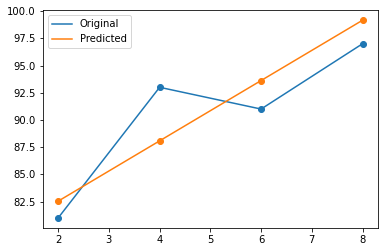

In [7]:
# x 값, y값 순서 
# 시간, 성적
pl.plot(x, y, label="Original")
pl.scatter(x, y)

# 시간, 예측
pl.plot(x, p_value, label="Predicted")
pl.scatter(x, p_value)

pl.legend()
pl.show()
